In [20]:
# import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [21]:
from sklearn.datasets import load_digits

In [22]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [23]:
#make a table outof it

data = pd.DataFrame(digits.data,digits.target)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [24]:
data['target']= digits.target
data.tail(20)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
4,0.0,0.0,0.0,2.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,13.0,3.0,0.0,0.0,4
4,0.0,0.0,0.0,1.0,13.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,15.0,7.0,0.0,0.0,4
7,0.0,0.0,3.0,10.0,16.0,16.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,12.0,0.0,0.0,0.0,0.0,7
2,0.0,3.0,14.0,15.0,6.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,4.0,15.0,13.0,12.0,11.0,1.0,0.0,2
8,0.0,0.0,10.0,16.0,14.0,5.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,11.0,16.0,15.0,6.0,0.0,0.0,8
2,0.0,1.0,10.0,13.0,2.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,9.0,13.0,11.0,10.0,9.0,0.0,2
2,0.0,0.0,15.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,13.0,10.0,6.0,2.0,0.0,2
5,0.0,0.0,1.0,10.0,14.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,14.0,4.0,0.0,0.0,5
7,0.0,1.0,10.0,16.0,15.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,10.0,15.0,2.0,0.0,0.0,0.0,7
9,0.0,0.0,4.0,14.0,15.0,6.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,4.0,13.0,15.0,9.0,0.0,0.0,9


In [25]:
X= data.drop(['target'],axis='columns')
y = data.target

In [26]:
#split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.svm import SVC

model  =SVC(kernel="sigmoid")

In [28]:
model.fit(X,y)

SVC(kernel='sigmoid')

In [29]:
model.score(X_test,y_test
            )

0.9055555555555556

In [30]:
digits.target[91]

np.int64(3)

In [31]:
model.predict([digits.data[91]])

array([3])

In [32]:
one = data[data.target == 1]
two = data[data.target == 2]
three = data[data.target == 3]
four= data[data.target == 4]
five= data[data.target == 5]
six= data[data.target == 6]
seven = data[data.target == 7]
eight= data[data.target == 8]
nine= data[data.target == 9]
zero = data[data.target == 0]

In [33]:
zero.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
0,0.0,0.0,1.0,9.0,15.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,10.0,13.0,3.0,0.0,0.0,0
0,0.0,0.0,3.0,13.0,11.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,12.0,13.0,4.0,0.0,0.0,0
0,0.0,0.0,10.0,14.0,11.0,3.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,11.0,16.0,12.0,3.0,0.0,0.0,0
0,0.0,0.0,6.0,14.0,10.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,16.0,11.0,1.0,0.0,0.0,0


Text(0, 0.5, 'Width of sepal')

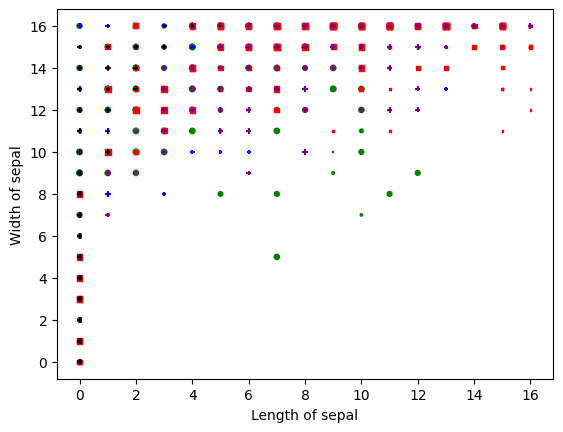

In [34]:
plt.scatter(zero[2], zero[3],zero[4],
            color='green', marker="o")
plt.scatter(one[2], one[3],one[4],
            color='blue', marker="+")
plt.scatter(two[2], two[3], two[4],
            color='red', marker="s")
plt.scatter(three[2], three[3], three[4],
            color='purple', marker="+")
plt.scatter(four[2], four[3], four[4],
            color='black', marker="+")

plt.xlabel("Length of sepal")
plt.ylabel("Width of sepal")